In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import datetime
import os
print(os.listdir("../input/superstore-dataset-final"))

['Sample - Superstore.csv']


##  IMPORTING DATA

In [2]:
dt=pd.read_csv("../input/superstore-dataset-final/Sample - Superstore.csv",encoding='ISO-8859-1')
dt.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
dt.shape

(9994, 21)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
dt.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

> There is no missing value, so we can pass encoder methods.(label and onehot methods)

In [6]:
dt.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## DATA ANALYSIS AND VISUALIZATION

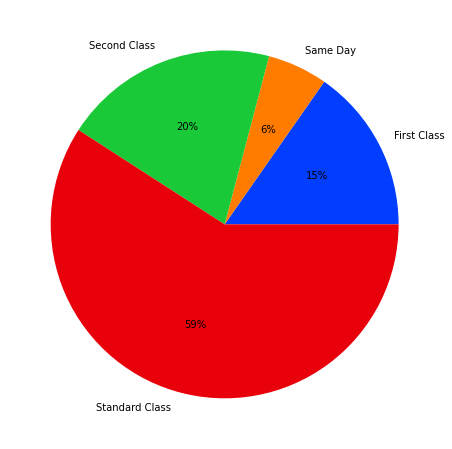

In [7]:
ss=dt.loc[:,["Ship Mode","Sales"]]
ss=ss.groupby(by=["Ship Mode"]).sum()
labels=[]
for i in ss.index:
    labels.append(i)  
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')
plt.pie(ss["Sales"],colors = colors,labels=labels, autopct = '%0.0f%%')
plt.show()

> As we see at this pie, standard class has better sales than others.

 # WHO BOUGHT MORE PRODUCTS ?

In [8]:
dt.groupby(by=["Customer ID","Customer Name"]).sum().sort_values(by=["Sales"],ascending=False).iloc[0,:]

Row ID          77545.0000
Postal Code    482091.0000
Sales           25043.0500
Quantity           50.0000
Discount            3.7000
Profit          -1980.7393
Name: (SM-20320, Sean Miller), dtype: float64

> Sean Miller has bought a lot of products than the others so He is the best buyer

# WHO BOUGHT LESS PRODUCTS ?

In [9]:
dt.groupby(by=["Customer ID","Customer Name"]).sum().sort_values(by=["Sales"]).iloc[0,:]

Row ID           3572.0000
Postal Code    117197.0000
Sales               4.8330
Quantity            4.0000
Discount            1.4000
Profit             -3.3156
Name: (TS-21085, Thais Sissman), dtype: float64

> Thais Sissman is the worst buyer

# WHICH STATE HOW MANY PRODUCT BOUGHT ?


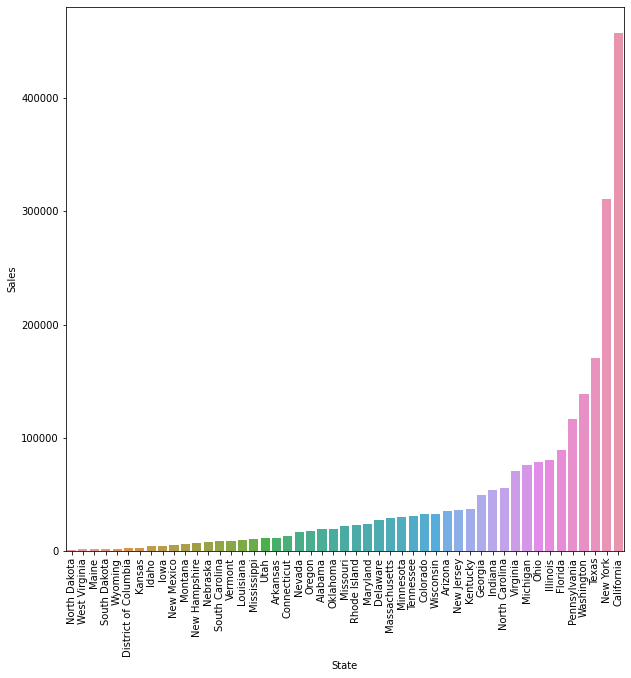

In [10]:
states=dt.loc[:,["State","Sales"]]
states=states.groupby(by=["State"]).sum().sort_values(by="Sales")
plt.figure(figsize=(10,10))
sns.barplot(x=states.index,y=states["Sales"],data=states)
plt.xticks(rotation = 90)
plt.xlabel=("STATES")
plt.ylabel=("SALES")
plt.show()


> People of California have bought so many items than the other and North Dakato's people don't buy so many items

# WHICH THE BEST PROFITS OF STATES?

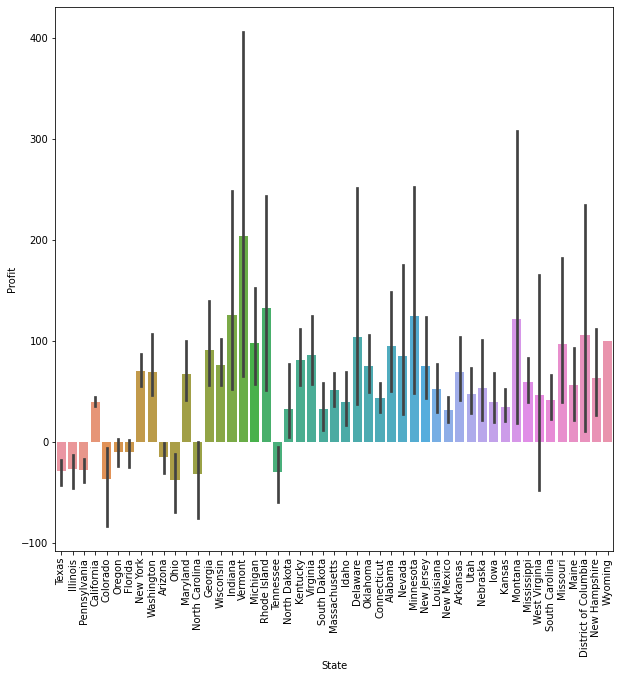

In [11]:
pr=dt.groupby(by=["State","Profit"]).sum().sort_values(by="Sales").reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x=pr.State,y=pr["Profit"],data=states)
plt.xticks(rotation = 90)
plt.xlabel=("STATES")
plt.xlabel=("Profit")
plt.show()


# WHICH REGION ?

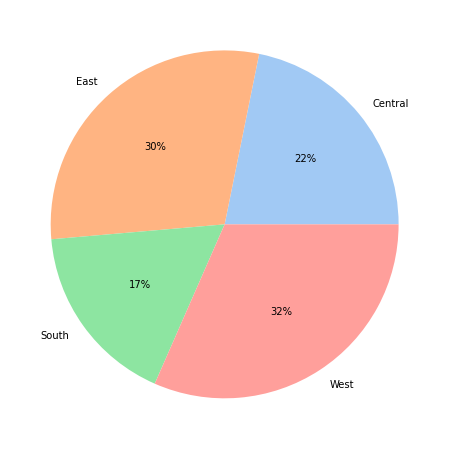

In [12]:
d=dt.groupby(by=["Region"]).sum()
labels=[]
for i in d.index:
    labels.append(i)  
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')
plt.pie(d["Sales"],colors = colors,labels=labels, autopct = '%0.0f%%')
plt.show()

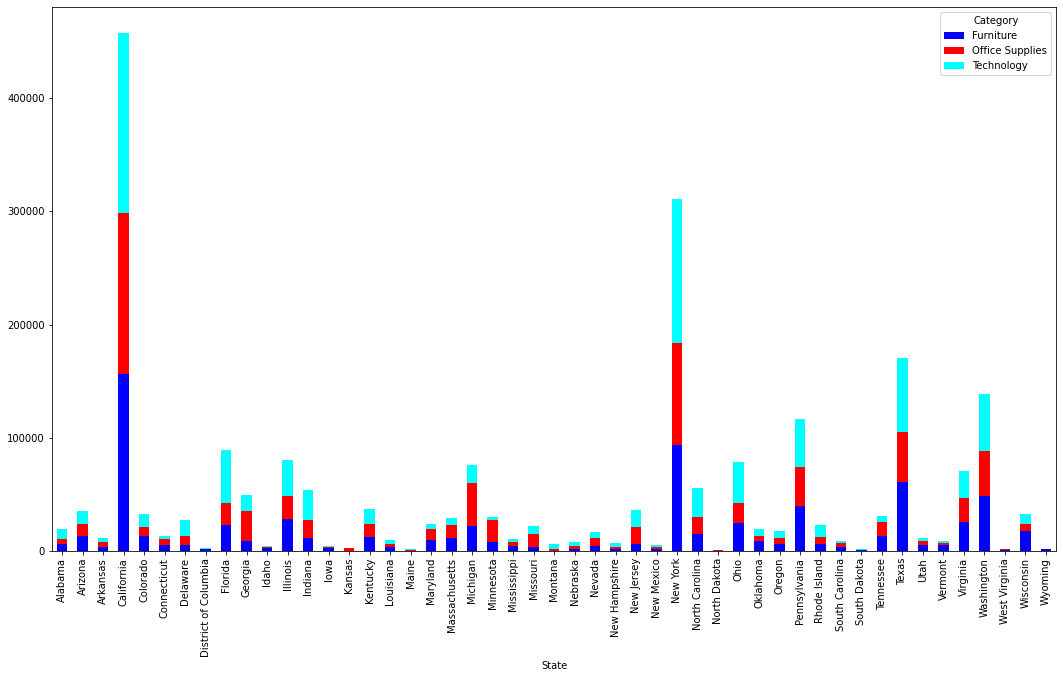

In [13]:
pvt=dt.groupby(by=["State","Category"]).sum("Sales").reset_index()
pvt = pvt.pivot(index="State", columns='Category', values='Sales').reset_index()
pvt.set_index('State').plot(kind='bar', color=["blue","red","cyan"],figsize=(18,10),stacked=True)
plt.show()


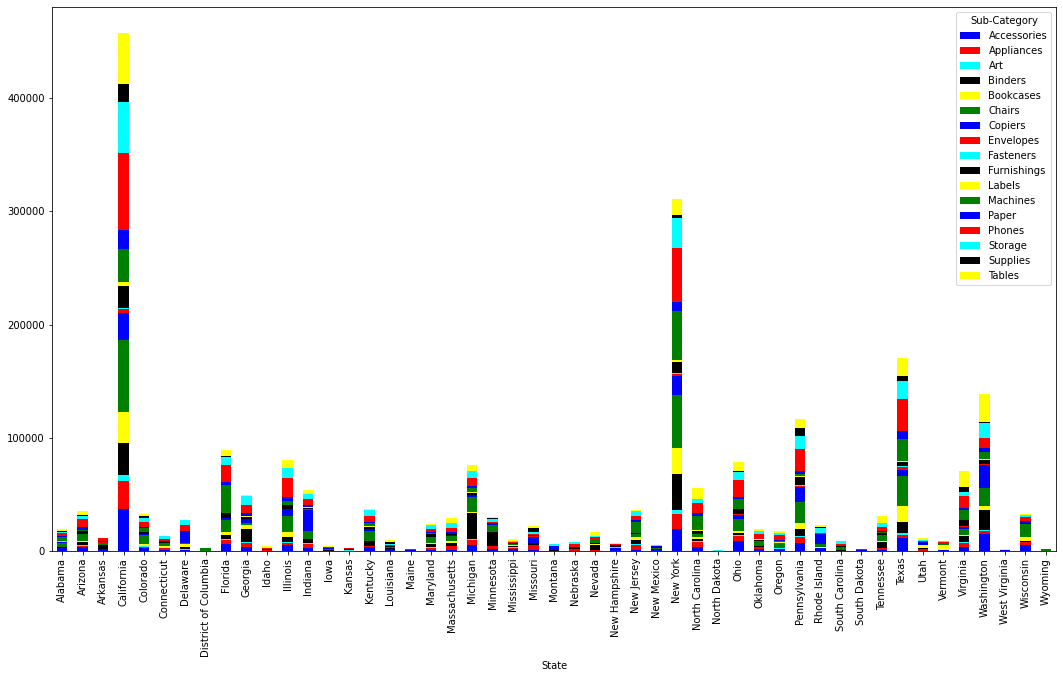

In [14]:
pvt=dt.groupby(by=["State","Sub-Category"]).sum("Sales").reset_index()
pvt = pvt.pivot(index="State", columns="Sub-Category", values='Sales').reset_index()
pvt.set_index('State').plot(kind='bar', color=["blue","red","cyan","black","yellow","green"],figsize=(18,10),stacked=True)
plt.show()

# THE BEST AND WORST PRODUCT WHICH IS SOLD

In [15]:
print("the worst one:{}".format(dt.groupby(by=["Product Name"]).sum().sort_values(["Sales"]).index[0]).upper())
print("the best one:{}".format(dt.groupby(by=["Product Name"]).sum().sort_values(["Sales"]).index[-1]).upper())


THE WORST ONE:EUREKA DISPOSABLE BAGS FOR SANITAIRE VIBRA GROOMER I UPRIGHT VAC
THE BEST ONE:CANON IMAGECLASS 2200 ADVANCED COPIER


# SALES BY YEARS

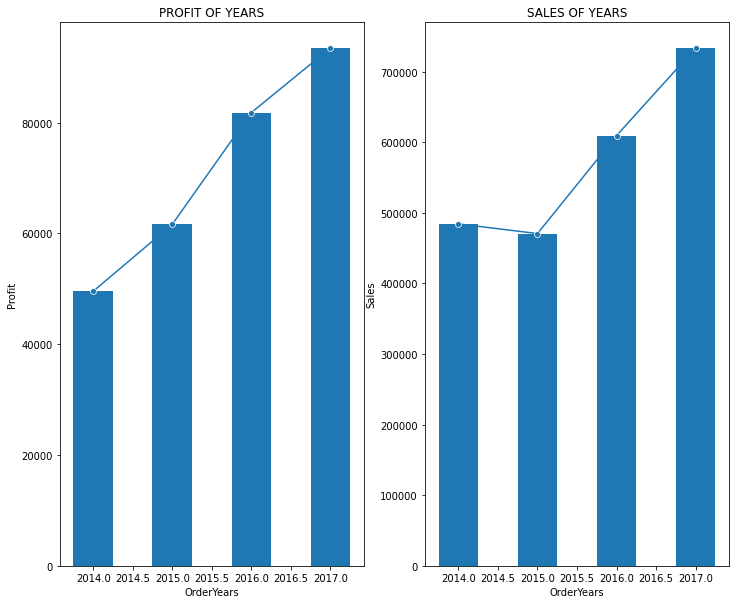

In [16]:
dt['PROFITSYears']=pd.DatetimeIndex(dt['Order Date']).year
yd=dt.groupby(by=["PROFITSYears"]).sum("Profit").reset_index()
dt['OrderYears']=pd.DatetimeIndex(dt['Order Date']).year
yd=dt.groupby(by=["OrderYears"]).sum("Sales").reset_index()
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
sns.lineplot(yd["OrderYears"],yd["Profit"],marker='o')
plt.bar(yd["OrderYears"],yd["Profit"],width=0.5)
plt.title("PROFIT OF YEARS")
plt.subplot(1, 2, 2)
sns.lineplot(yd["OrderYears"],yd["Sales"],marker='o')
plt.bar(yd["OrderYears"],yd["Sales"],width=0.5)
plt.title("SALES OF YEARS")

plt.show()

# HEAT MAP AND CORRELATION

<AxesSubplot:>

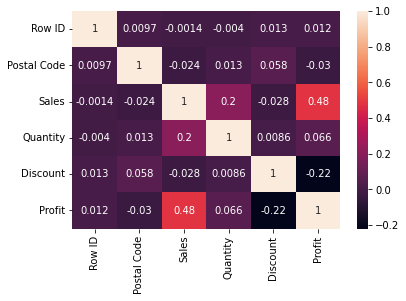

In [17]:
dt.drop(['PROFITSYears','OrderYears'],axis=1,inplace=True)
sns.heatmap(dt.corr(),annot=True)

> We can say that there is a good correlation between sales and profit. As we estimate,there is negative correlation between discount and profit.

# RANDOM FOREST REGRESSION ANALYSIS

In [18]:
dt["Years"]=pd.DatetimeIndex(dt['Order Date']).year
x=dt.loc[:,["Years","Quantity","Discount","Profit"]]
y=dt.loc[:,["Sales"]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 100,random_state=0)
rf_reg.fit(x_train,y_train)
from sklearn.metrics import r2_score
print('Random Forest R2 degeri')
print(r2_score(y_test,rf_reg.predict(x_test)))










Random Forest R2 degeri
0.6785887077956572
